In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading the csv file of the dataset

In [2]:
#import the dataset
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


####  The column "veil-type" has only 1 unique value - that is "p", all 8124 mushroom instances have the same veil-type and it is not contributing to the data so we remove it.

In [5]:
df.drop(["veil-type"],axis=1, inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


### Finding the shape of the dataset

In [6]:
print('Shape of the Dataset:', df.shape)

Shape of the Dataset: (8124, 22)


### Visualizing the count of edible and poisonous mushrooms

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
# Checking the unique values
df["class"].unique()

array(['p', 'e'], dtype=object)

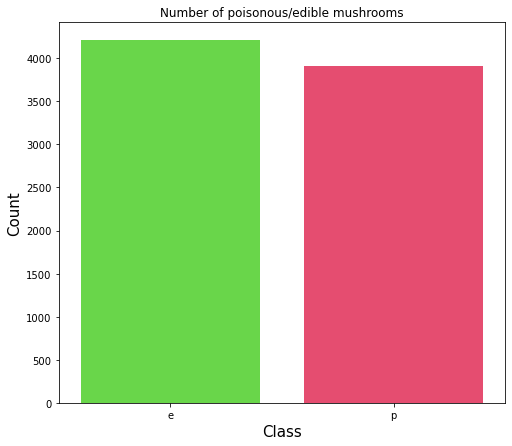

In [9]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

#### As we can see. The dataset is balanced.

### Converting categorical data to numerical

#### The data is categorical so we’ll use LabelEncoder and One Hot Encoding to convert it to numerical. 

In [ ]:
# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


#### We can see how it has converted some of the features to values of 0 or 1. More importantly, our labels (the _class_ column) are now 0=e, and 1=p.

In [ ]:
# One-Hot Encoding

In [ ]:
df1 = pd.get_dummies(df)
df1.head()

### Seperating labels from features.

#### X will now contain our features, and y our labels (0 for edible and 1 for poisonous/unknown) 

In [18]:
X = df.iloc[:,1:22]
Y = df.iloc[:, 0]

In [19]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [20]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [21]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [22]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


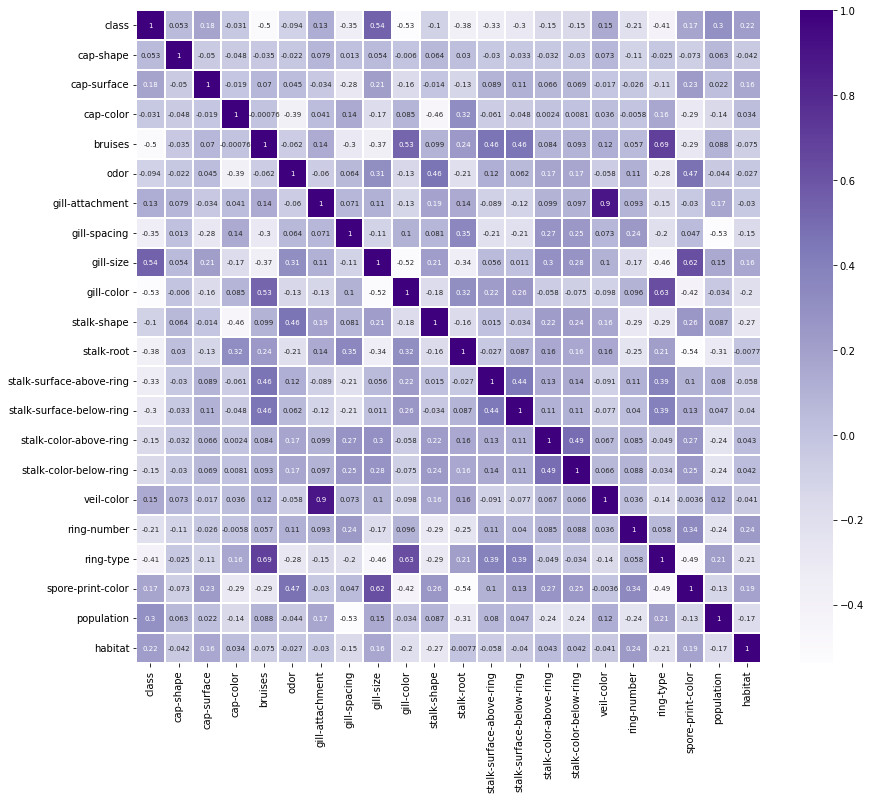

In [24]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=.1, cmap="Purples", annot=True, annot_kws={"size": 7})
plt.show()

### Standardizing the values 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=10)

# Classification Models

## 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [28]:
# Model Building
mushroom_lr=LogisticRegression()
mushroom_lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
y_prob = mushroom_lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mushroom_lr.score(X_test, y_pred)

1.0

### Model Accuracy

In [30]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[1631,   68],
       [  83, 1468]], dtype=int64)

In [31]:
# classification Report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1699
           1       0.96      0.95      0.95      1551

    accuracy                           0.95      3250
   macro avg       0.95      0.95      0.95      3250
weighted avg       0.95      0.95      0.95      3250



In [32]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(1631+1468)/(1631+68+83+1468)

0.9535384615384616

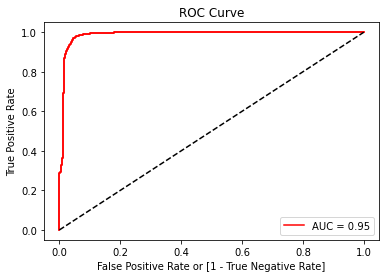

Accuracy is: 0.9532312973573789


In [33]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(Y,mushroom_lr.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y_test,y_pred)

plt.plot(fpr,tpr,color='red',label= 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('Accuracy is:',auc)

## 2. Decision Tree

In [34]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeRegressor

In [35]:
# fitting on train data
model = DecisionTreeClassifier(criterion='entropy',max_depth = 5) 
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

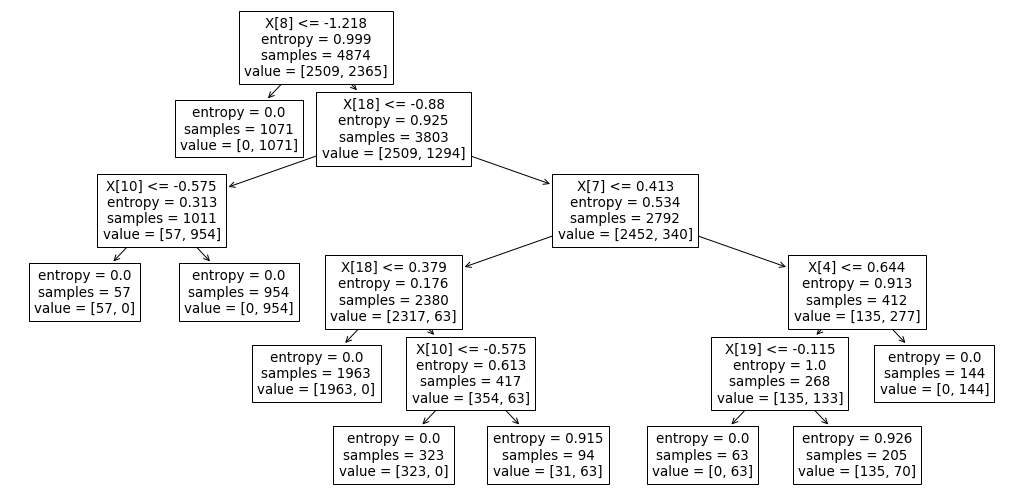

In [36]:
fig = plt.figure(figsize=(18,9))
tree.plot_tree(model)
plt.show()

In [37]:
# predict on test data
preds = model.predict(X_test) 
pd.Series(preds).value_counts()

0    1740
1    1510
dtype: int64

In [38]:
pd.crosstab(Y_test,preds)

col_0,0,1
class,,
0,1682,17
1,58,1493


In [39]:
# Accuracy
np.mean(preds==Y_test)*100

97.6923076923077

In [40]:
# Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(Y_test,preds)
confusion_matrix

array([[1682,   17],
       [  58, 1493]], dtype=int64)

In [41]:
# Classification Report
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.99      0.96      0.98      1551

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250



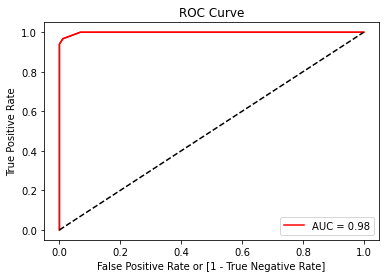

Accuracy is: 0.9762994426501121


In [42]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(Y,model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y_test,preds)

plt.plot(fpr,tpr,color='red',label= 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('Accuracy is:',auc)

## 3. Random Forest

In [43]:
# Necessary Libraries
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Fitting on train data
RF = RandomForestClassifier(n_estimators=100,max_features=3)
RF.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [45]:
# Predict on test data
y_predict = RF.predict(X_test)
np.mean(y_predict==Y_test)*100 

100.0

In [46]:
# Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(Y_test,y_predict)
confusion_matrix

array([[1699,    0],
       [   0, 1551]], dtype=int64)

In [47]:
# Classification Report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00      1551

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



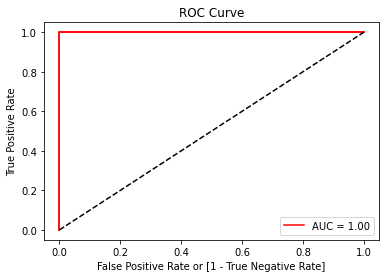

Accuracy is: 1.0


In [48]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(Y,RF.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y_test,y_predict)

plt.plot(fpr,tpr,color='red',label= 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('Accuracy is:',auc)

## 4. Support Vector Machines(SVM)

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [50]:
svm = SVC(kernel ='linear',C= 0.1, gamma = 50)
svm.fit(X_train , Y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 95.72307692307692


In [51]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[1632,   67],
       [  72, 1479]], dtype=int64)

In [52]:
clr = classification_report(Y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.96      0.95      0.96      1551

    accuracy                           0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250



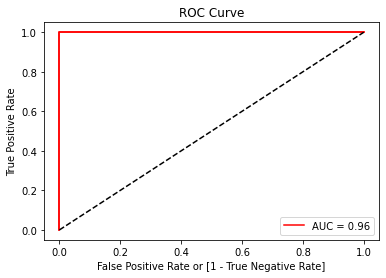

Accuracy is: 0.9570716874074292


In [53]:
# ROC Curve plotting and finding AUC value
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y_test,y_pred)

plt.plot(fpr,tpr,color='red',label= 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('Accuracy is:',auc)

## 5. Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [55]:
# Gaussian Naive Bayes
Gmodel = GaussianNB()
train_pred_gau = Gmodel.fit(X_train,Y_train).predict(X_test)

In [56]:
#accuracy score on train data using gaussian NB
train_acc_gau=np.mean(Y_test==train_pred_gau)
train_acc_gau

0.9212307692307692

In [57]:
#confusion matrix for gaussian model 
from  sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_test,train_pred_gau)

array([[1569,  130],
       [ 126, 1425]], dtype=int64)

In [58]:
# classification report for gaussian model 
CLF = classification_report(Y_test,train_pred_gau)
print(CLF)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1699
           1       0.92      0.92      0.92      1551

    accuracy                           0.92      3250
   macro avg       0.92      0.92      0.92      3250
weighted avg       0.92      0.92      0.92      3250



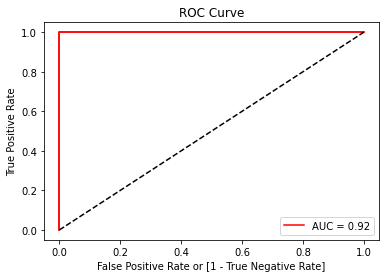

Accuracy is: 0.9211232457823069


In [59]:
# ROC Curve plotting and finding AUC value
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y_test,train_pred_gau)

plt.plot(fpr,tpr,color='red',label= 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('Accuracy is:',auc)

In [60]:
# Creating a Performance report for all ML Models
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score


classifier_pred = {'Logistic Regression ':y_pred, 'Decision Tree Classifier':preds,
                   'Random Forest Classifier':y_predict, 'Support Vector Classifier':y_pred, 'Gaussian Naive Bayes':train_pred_gau,}

report = dict()

for key, value in classifier_pred.items():
    # calculating scores 
    accuracy = accuracy_score(Y_test, value)
    precision = precision_score(Y_test, value)
    recall = recall_score(Y_test, value)
    f1 = f1_score(Y_test, value)
    # entering scores in report
    report[key] = [accuracy, precision, recall, f1]

# report dataframe
report_df = pd.DataFrame(data=report, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
report_df.index.name = 'ML Model'
report_df

,Accuracy,Precision,Recall,F1 Score
ML Model,,,,
Logistic Regression,0.957231,0.956662,0.953578,0.955118
Decision Tree Classifier,0.976923,0.988742,0.962605,0.975498
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Support Vector Classifier,0.957231,0.956662,0.953578,0.955118
Gaussian Naive Bayes,0.921231,0.916399,0.918762,0.917579
